In [1]:
using Pkg
Pkg.activate("../../Project.toml")

include("../../LogLoss/RealRealHighDimension.jl")
include("../imputation.jl");
using JLD2
using DataFrames
using StatProfilerHTML
using BenchmarkTools

  Activating project at `~/QuantumInspiredML`


In [ ]:
svpath_slb = "../../Data/ecg200/mps_saves/sahand_legendre_ns_d20_chi100_range.jld2" #legendre_no_norm_ns_d16_chi60.jld2" #legendreNN2_ns_d8_chi35.jld2"
svpath_sl = "../../Data/ecg200/mps_saves/sahand_legendre_ns_d20_chi100.jld2"
svpath_leg = "../../Data/ecg200/mps_saves/legendre_no_norm10_ns_d20_chi100.jld2" #legendre_no_norm_ns_d16_chi60.jld2" #legendreNN2_ns_d8_chi35.jld2"

dloc =  "../../Data/ecg200/datasets/ecg200.jld2"



f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)



###################################3

f = jldopen(svpath_sl, "r")
    mps_sl = read(f, "mps")
    opts_sl = read(f, "opts")
close(f)

opts_sl, _... = safe_options(opts_sl, nothing, nothing)

fc_sl = load_forecasting_info_variables(mps_sl, X_train, y_train, X_test, y_test, opts_sl);


#########################################
f = jldopen(svpath_slb, "r")
    mps_slb = read(f, "mps")
    opts_slb = read(f, "opts")
close(f)

opts_slb, _... = safe_options(opts_slb, nothing, nothing)

fc_slb = load_forecasting_info_variables(mps_slb, X_train, y_train, X_test, y_test, opts_slb);

#########################################
f = jldopen(svpath_leg, "r")
    mps_leg = read(f, "mps")
    opts_leg = read(f, "opts")
close(f)

opts_leg, _... = safe_options(opts_leg, nothing, nothing)

fc_leg = load_forecasting_info_variables(mps_leg, X_train, y_train, X_test, y_test, opts_leg);



In [4]:
n1s = sum(y_test)
n0s = length(y_test) - n1s

samples = [1:n0s; 1:n1s]
impute_sites = collect(3:21)

classes = [zeros(Int,n0s); ones(Int,n1s)]

100-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [5]:
samples[94]

58

In [18]:
include("../ForecastingMainNew.jl");

dx=1E-4
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=dx))
mode_index=Index(opts_slb.d)
xvals_enc= [get_state(x, opts_slb, fc_slb[1].enc_args) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

  8.190363 seconds (22.33 M allocations: 5.481 GiB, 4.57% gc time, 36.58% compilation time)
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.535195 │
│ NN_MAE │ 0.562345 │
╰────────┴──────────╯


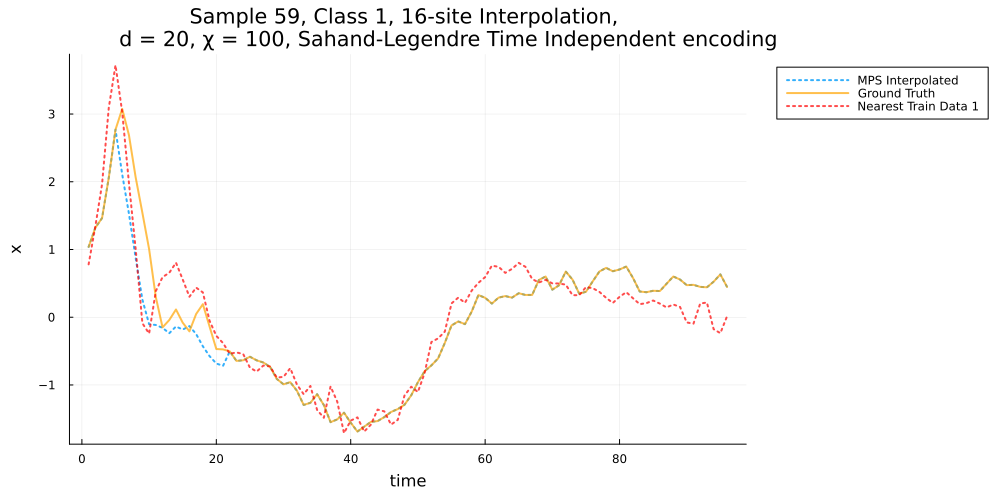

In [19]:
max_jump=0.5
class = 1
impute_sites = collect(6:21)
instance_idx = 59 # 4
invert_transform=true
@time begin 
stats, p1_ns = any_impute_single_timeseries(fc_slb, class, instance_idx, impute_sites, :directMedian; invert_transform=invert_transform, NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, dx=dx, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);
end

pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)


1 rescaling operations were performed!
 20.529435 seconds (91.72 M allocations: 17.540 GiB, 6.47% gc time)
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.329258 │
│ NN_MAE │ 0.256498 │
╰────────┴──────────╯


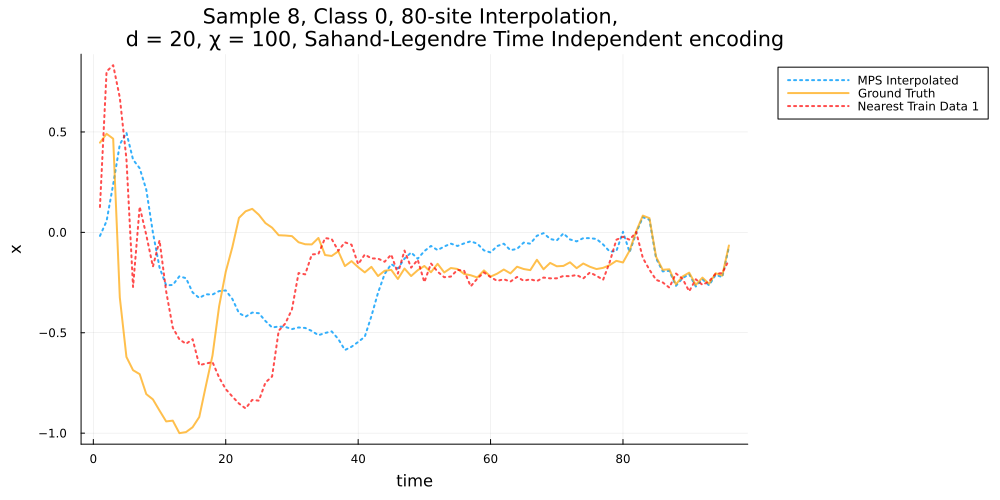

In [13]:
max_jump=0.5
class = 0
impute_sites = collect(1:80)
instance_idx = 8 # 4
invert_transform=false
@time begin 
stats, p1_ns = any_impute_single_timeseries(fc_sl, class, instance_idx, impute_sites, :directMedian; invert_transform=invert_transform, NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, dx=dx, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);
end

pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)


In [20]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index = Index(opts_sl.d)

xvals_enc_slb= [get_state(x, opts_slb, fc_slb[1].enc_args) for x in xvals]
xvals_enc_it_slb=[ITensor(s, mode_index) for s in xvals_enc_slb];

xvals_enc_sl= [get_state(x, opts_sl, fc_sl[1].enc_args) for x in xvals]
xvals_enc_it_sl=[ITensor(s, mode_index) for s in xvals_enc_sl];

xvals_enc_leg= [get_state(x, opts_leg, fc_leg[1].enc_args) for x in xvals]
xvals_enc_it_leg=[ITensor(s, mode_index) for s in xvals_enc_leg];

n1s = sum(y_test)
n0s = length(y_test) - n1s

samples = [1:n0s; 1:n1s]
impute_sites = collect(3:21)

classes = [zeros(Int,n0s); ones(Int,n1s)]
max_jump=1
slb_ps = []
slb_stats = []

sl_ps = []
sl_stats = []

leg_ps = []
leg_stats = []

for (i,s) in enumerate(samples)
    
    println("$i/$(length(samples))")
    class = classes[i]
    instance_idx = s
    slb_stat, slb_p1 = any_impute_single_timeseries(fc_slb, class, instance_idx, impute_sites, :directMedian; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc_slb, xvals_enc_it=xvals_enc_it_slb, max_jump=max_jump);
    push!(slb_ps, slb_p1...)
    push!(slb_stats, slb_stat)

    leg_stat, leg_p1 = any_impute_single_timeseries(fc_leg, class, instance_idx, impute_sites, :directMedian; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc_leg, xvals_enc_it=xvals_enc_it_leg, max_jump=max_jump);
    push!(leg_ps, leg_p1...)
    push!(leg_stats, leg_stat)

    sl_stat, sl_p1 = any_impute_single_timeseries(fc_sl, class, instance_idx, impute_sites, :directMedian; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc_sl, xvals_enc_it=xvals_enc_it_sl, max_jump=max_jump);
    push!(sl_ps, sl_p1...)
    push!(sl_stats, sl_stat)


end

94/100
1 rescaling operations were performed!
1 rescaling operations were performed!
1 rescaling operations were performed!
1 rescaling operations were performed!
95/100
96/100
97/100
98/100
99/100
100/100


In [4]:
svpath = "ecg200/Median_d20chi100_sites3:21_leg_sl_slb.jld2"
# f = jldopen(svpath, "w")
#     write(f, "slb_stats", slb_stats)
#     write(f, "sl_stats", sl_stats)
#     write(f, "leg_stats", leg_stats)

# close(f)
f = jldopen(svpath, "r")
    sl_stats = f["sl_stats"]
    slb_stats = f["slb_stats"]
    leg_stats = f["leg_stats"]
close(f)

In [10]:
stats_slb = vcat(DataFrame.(slb_stats)...)
stats_sl = vcat(DataFrame.(sl_stats)...)
stats_leg = vcat(DataFrame.(leg_stats)...)

println("Legendre")
@show describe(stats_leg) 

println("S-L")
@show describe(stats_sl)

println("SL-Bounded")
@show describe(stats_slb)




perms = sortperm(stats_sl[!,1])
@show zip(perms, stats_sl[!,1][perms])  |> collect |> reverse

Legendre
describe(stats_leg) = 2×7 DataFrame
 Row │ variable  mean      min       median    max      nmissing  eltype
     │ Symbol    Float64   Float64   Float64   Float64  Int64     DataType
─────┼─────────────────────────────────────────────────────────────────────
   1 │ MAE       0.53366   0.110944  0.38475   2.41154         0  Float64
   2 │ NN_MAE    0.393455  0.130001  0.330921  1.47692         0  Float64
S-L
describe(stats_sl) = 2×7 DataFrame
 Row │ variable  mean      min       median    max      nmissing  eltype
     │ Symbol    Float64   Float64   Float64   Float64  Int64     DataType
─────┼─────────────────────────────────────────────────────────────────────
   1 │ MAE       0.526659  0.109338  0.370299  2.41204         0  Float64
   2 │ NN_MAE    0.393455  0.130001  0.330921  1.47692         0  Float64
SL-Bounded
describe(stats_slb) = 2×7 DataFrame
 Row │ variable  mean      min       median    max      nmissing  eltype
     │ Symbol    Float64   Float64   Float64   Float

93-element Vector{Tuple{Int64, Float64}}:
 (13, 2.4120392033736846)
 (16, 2.265246707384211)
 (8, 2.147934170797369)
 (24, 1.7874189707144739)
 (34, 1.7726879529828954)
 (4, 1.5012517367947371)
 (19, 1.1884039333184213)
 (71, 1.182370866421053)
 (53, 1.0036139160736846)
 (12, 0.9828986791499998)
 ⋮
 (27, 0.18736159555263157)
 (44, 0.18483150305789484)
 (18, 0.17804283440789453)
 (40, 0.15480457559078975)
 (67, 0.14801257150394723)
 (55, 0.13365201267894714)
 (69, 0.13225908754605267)
 (14, 0.12861350259999976)
 (57, 0.10933837603421064)

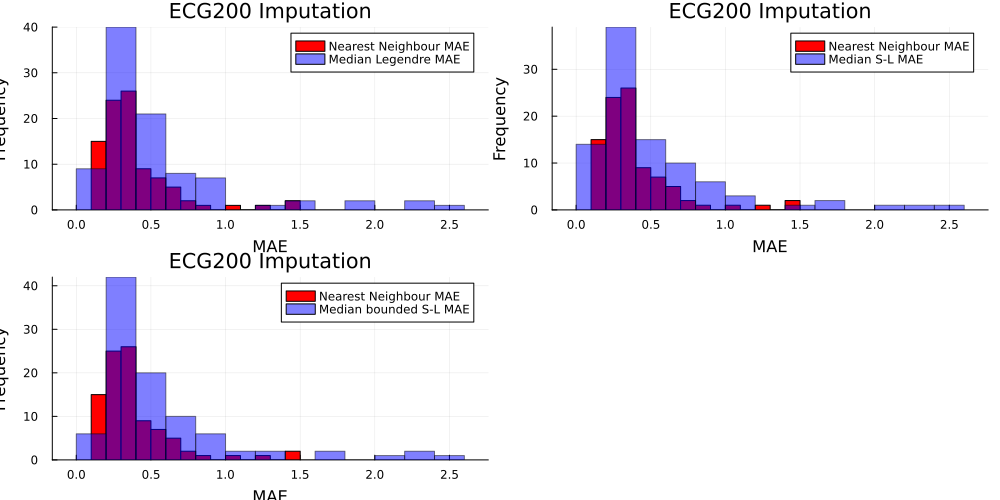

In [11]:
nbins=20
histogram(stats_leg[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)
h1 = histogram!(stats_leg[!, :MAE], label="Median Legendre MAE", colour=:blue, alpha=0.5, bins=nbins)
ylabel!("Frequency")
xlabel!("MAE")

histogram(stats_sl[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)
h2 = histogram!(stats_sl[!, :MAE], label="Median S-L MAE", colour=:blue, alpha=0.5, bins=nbins)
ylabel!("Frequency")
xlabel!("MAE")

histogram(stats_slb[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)
h3 = histogram!(stats_slb[!, :MAE], label="Median bounded S-L MAE", colour=:blue, alpha=0.5, bins=nbins)
ylabel!("Frequency")
xlabel!("MAE")


p = plot([h1, h2, h3]..., size=(1000,500), title="ECG200 Imputation")
# savefig(p, "figs/hists.svg")

100-element Vector{Int64}:
  8
 24
 13
 34
  4
 16
  6
 53
 58
 25
  ⋮
  9
 14
 55
 62
 50
 69
 40
 56
 57

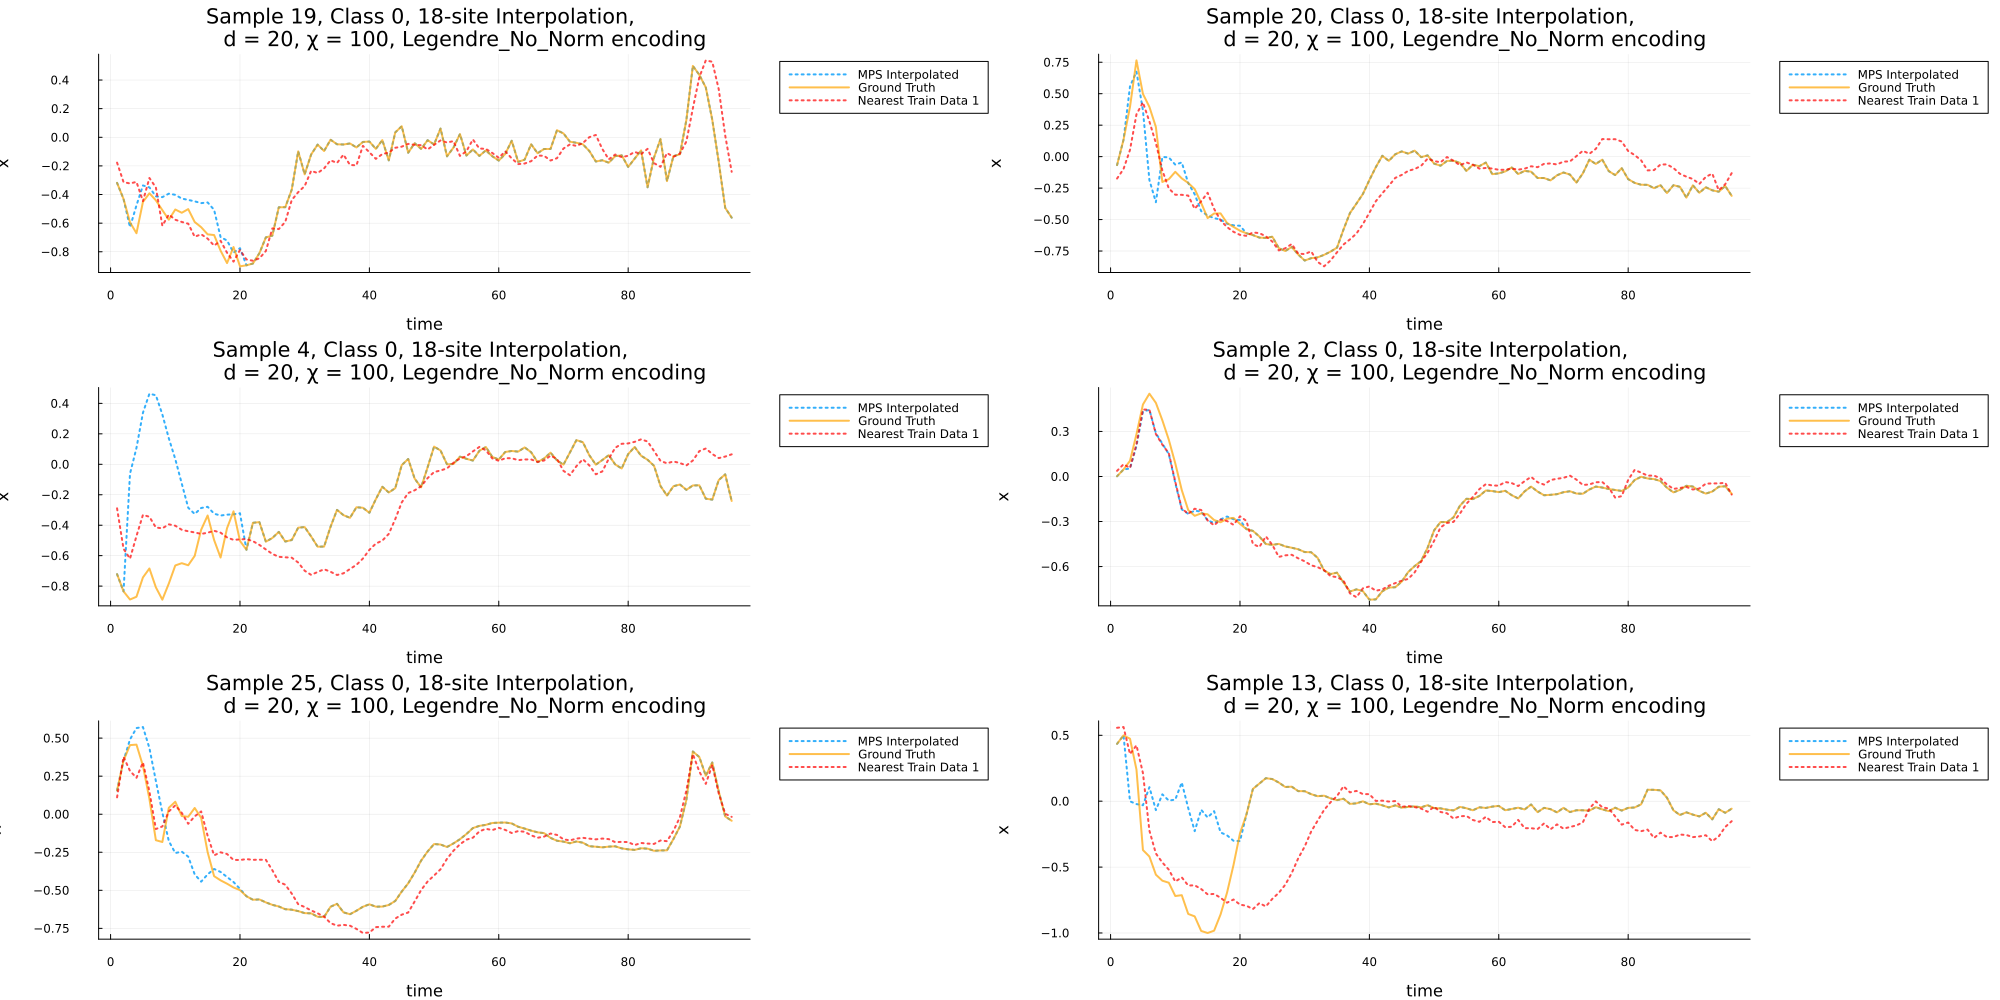

In [98]:
p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
# savefig(p1, "figs/c0ecg.svg")

p2 = plot(ps[7:12]..., size=(2000,1000), layout=(3,2))
# savefig(p2, "figs/c1ecg.svg")
p1


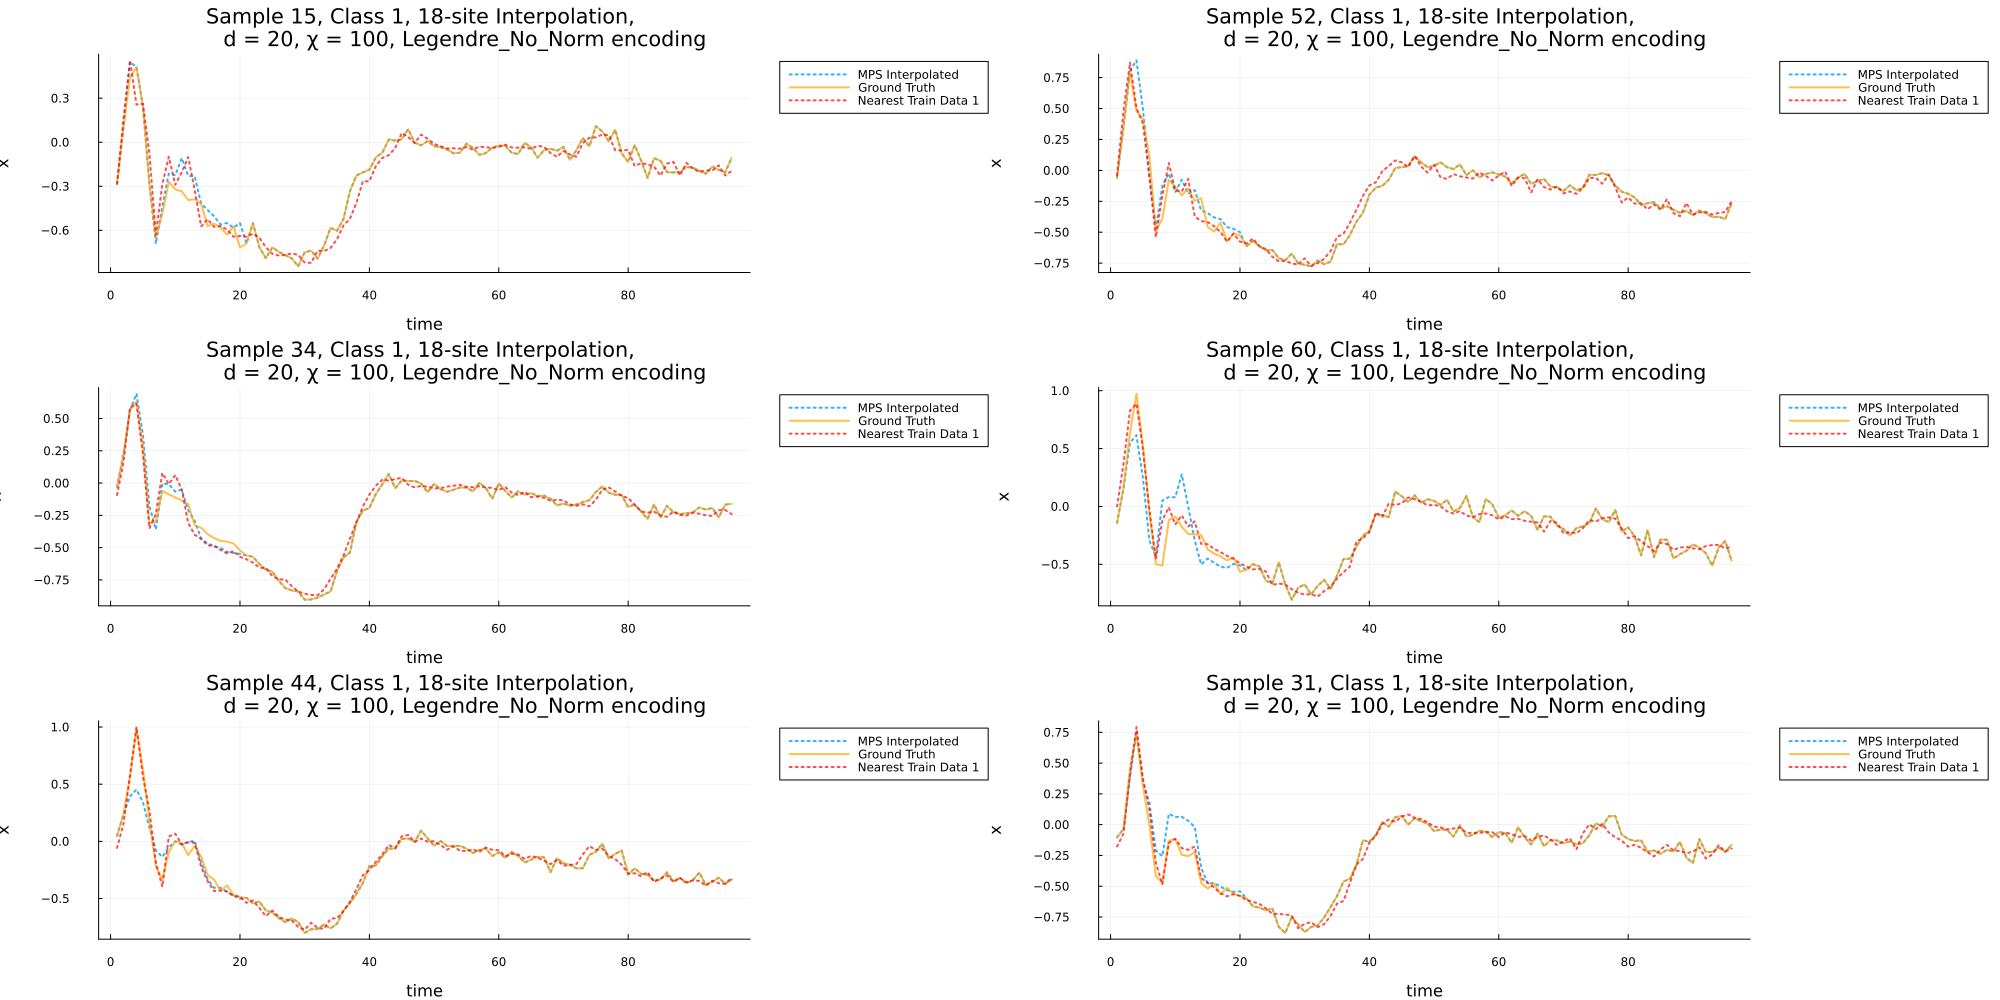

In [99]:
p2

# ItalyPower

In [35]:
svpath = "../../Data/italypower/mps_saves/sahand_legendre__ns_d12_chi60.jld2"
svpath_leg = "../../Data/italypower/mps_saves/legendre_no_normGD_10_ns_d16_chi80.jld2"

dloc =  "../../Data/italypower/datasets/ItalyPowerDemandOrig.jld2"
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

f = jldopen(svpath, "r")
    mps_sl_ipd = read(f, "mps")
    opts_sl_ipd = read(f, "opts")
close(f)
opts_sl_ipd, _... = safe_options(opts_sl_ipd, nothing, nothing)

fc_sl_ipd = load_forecasting_info_variables(mps_sl_ipd, X_train, y_train, X_test, y_test, opts_sl_ipd);


#######################################
#########################################
f = jldopen(svpath_leg, "r")
    mps_leg_ipd = read(f, "mps")
    opts_leg_ipd = read(f, "opts")
close(f)

opts_leg_ipd, _... = safe_options(opts_leg_ipd, nothing, nothing)

fc_leg_ipd = load_forecasting_info_variables(mps_leg_ipd, X_train, y_train, X_test, y_test, opts_leg_ipd);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 67 training samples and 1029 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Sahand-Legendre Time Independent - detected.
 - d = 12, chi_max = 60
Re-encoding the training data to get the encoding arguments...

 Created 2 forecastable struct(s) containing class-wise mps and test samples.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 67 training samples and 1029 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 16, chi_max = 80

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [9]:
include("../ForecastingMainNew.jl");


In [10]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index_leg=Index(opts_leg_ipd.d)

xvals_enc_leg_ipd= [get_state(x, opts_leg_ipd, fc_leg_ipd[1].enc_args) for x in xvals]
xvals_enc_it_leg_ipd=[ITensor(s, mode_index_leg) for s in xvals_enc_leg_ipd];

mode_index_sl=Index(opts_sl_ipd.d)
xvals_enc_sl_ipd = [get_state(x, opts_sl_ipd, fc_sl_ipd[1].enc_args) for x in xvals]
xvals_enc_it_sl_ipd = [ITensor(s, mode_index_ipd) for s in xvals_enc_sl_ipd];

n1s = sum(y_test)
n0s = length(y_test) - n1s

samples = [1:n0s; 1:n1s]
impute_sites = collect(6:21)

classes = [zeros(Int,n0s); ones(Int,n1s)]
max_jump=1_ipd
leg_ps_ipd = []
sl_ps_ipd = []

leg_stats_ipd = []
sl_stats_ipd = []
_ipd
for (i,s) in enumerate(samples)
    println("$i/$(length(samples))")
    class = classes[i]
    instance_idx = s
    leg_stat_ipd, leg_p1_ipd = any_impute_single_timeseries(fc_leg_ipd, class, instance_idx, impute_sites, :directMedian; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc_leg_ipd, xvals_enc_it=xvals_enc_it_leg_ipd, max_jump=max_jump);
    push!(leg_ps_ipd, leg_p1_ipd...)
    push!(leg_stats_ipd, leg_stat_ipd)

    sl_stat_ipd, sl_p1_ipd = any_impute_single_timeseries(fc_sl_ipd, class, instance_idx, impute_sites, :directMedian; NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc_sl_ipd, xvals_enc_it=xvals_enc_it_sl_ipd, max_jump=max_jump);
    push!(sl_ps_ipd, sl_p1_ipd...)
    push!(sl_stats_ipd, sl_stat_ipd)


end

┌ Warning: Test set has a value more than 1% above upper bound after train normalization!
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/Imputation/imputation.jl:777
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/Imputation/imputation.jl:769
┌ Warning: Test set has a value more than 1% above upper bound after train normalization!
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/Imputation/imputation.jl:777
┌ Warning: Test set has a value more than 1% above upper bound after train normalization!
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/Imputation/imputation.jl:777
┌ Warning: Test set has a value more than 1% above upper bound after train normalization!
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/Imputation/imputation.jl:777


In [11]:
# svpath = "../../FinalBenchmarks/Imputation/ItalyPower/LSmed_sl_d16chi80.jld2"
# f = jldopen(svpath, "w")
#     write(f, "fc", fc_ipd)
#     write(f, "stat", ipd_mm_stats)
#     write(f, "ps", ipd_mm_ps);
# close(f)

svpath = "../../FinalBenchmarks/Imputation/ItalyPower/SLvLegd16chi80.jld2"
f = jldopen(svpath, "w")
    write(f, "leg_stats", leg_stats_ipd)
    write(f, "sl_stats", sl_stats_ipd);
close(f)

In [13]:
svpath = "../../FinalBenchmarks/Imputation/ItalyPower/Mode_GD_d16chi80.jld2"


KeyError: KeyError: key "stat" not found

In [15]:
# df_mode = vcat(DataFrame.(norm_mode_stats)...)
# @show describe(df_mode) ;

# println()
df_ls_mode = vcat(DataFrame.(ipd_mode_stats)...)
@show describe(df_ls_mode);

describe(df_ls_mode) = 2×7 DataFrame
 Row │ variable  mean      min        median    max       nmissing  eltype
     │ Symbol    Float64   Float64    Float64   Float64   Int64     DataType
─────┼───────────────────────────────────────────────────────────────────────
   1 │ MAE       0.209031  0.0526515  0.152567  0.919407         0  Float64
   2 │ NN_MAE    0.228281  0.0628499  0.193322  0.888347         0  Float64


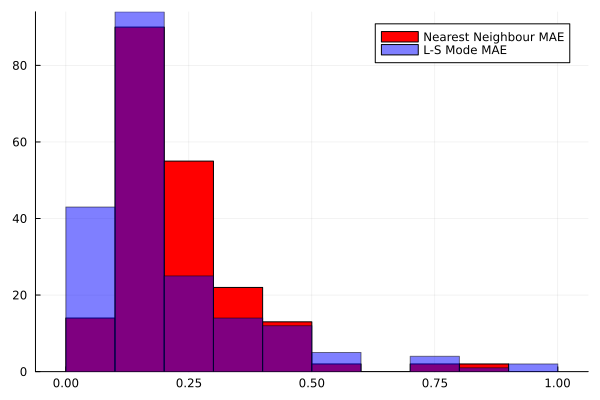

In [16]:
nbins=10

histogram(df_ls_mode[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)

h2 = histogram!(df_ls_mode[!, :MAE], label="L-S Mode MAE", colour=:blue, alpha=0.5, bins=nbins)



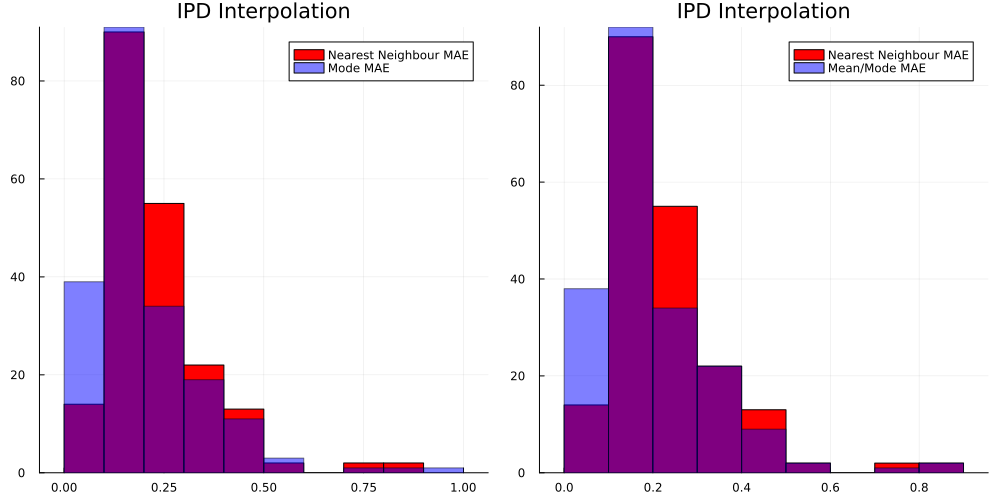

In [71]:
nbins=10
histogram(df_mm[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)

h1 = histogram!(df_mode[!, :MAE], label="Mode MAE", colour=:blue, alpha=0.5, bins=nbins)
histogram(df_mm[!, :NN_MAE], label="Nearest Neighbour MAE", colour=:red, bins=nbins)

h2 = histogram!(df_mm[!, :MAE], label="Mean/Mode MAE", colour=:blue, alpha=0.5, bins=nbins)

p = plot([h1, h2]..., size=(1000,500), title="IPD Imputation")
# savefig(p, "figs/ipdhists.svg")

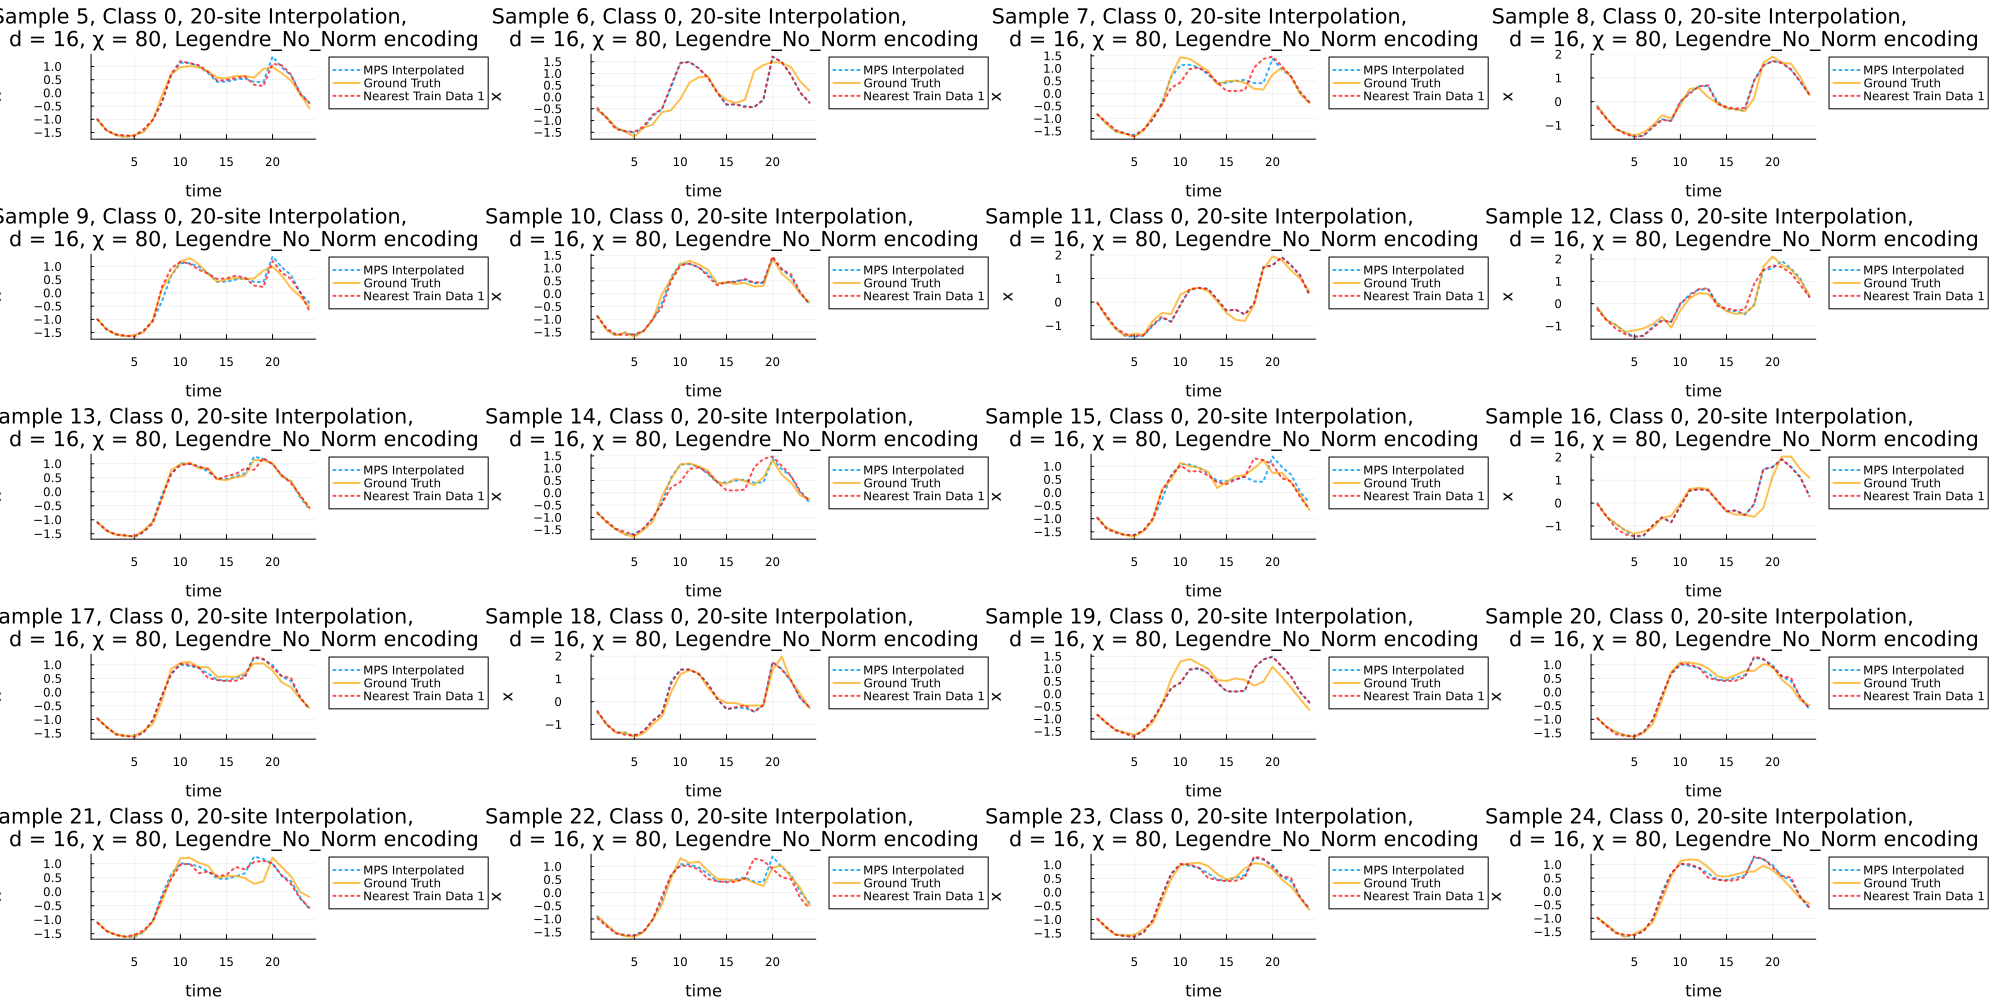

In [74]:
p1a = plot(ipd_mm_ps[5:24]..., size=(2000,1000), layout=(5,4))
savefig(p1a, "figs/mm_c0ipd_large.svg")
p1 = plot(ipd_mm_ps[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p1, "figs/mm_c0ipd_small.svg")

p2a = plot(ipd_mode_ps[5:24]..., size=(2000,1000), layout=(5,4))
savefig(p2a, "figs/mode_c0ipd_large.svg")
p2 = plot(ipd_mode_ps[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p2, "figs/mode_c0ipd_small.svg")
# savefig(p2, "figs/c1ecg.svg")
p1a

# By interp num benchmarks


In [7]:
svpath = "MeanMode_GD_d20chi100_fitpersite_small.jld2"
f = jldopen(svpath, "r")
    stats_mps = f["stats"]
    nendpoints_L = f["nendpoints"]
close(f)

means_mmL_ecg = Vector{Float64}(undef, length(stats_mps))
meds_mmL_ecg = Vector{Float64}(undef, length(stats_mps))

for (i,stat) in enumerate(stats_mps)
    df = vcat(DataFrame.(stat)...)

    means_mmL_ecg[i] = (df |> describe)[!,2][1]
    meds_mmL_ecg[i] = (df |> describe)[!,4][1]
end

In [5]:
svpath = "SL_ecg200_fitpersite_nomps.jld2"
f = jldopen(svpath, "r")
    stats_mps = f["stats"]
    nendpoints_SL = f["nendpoints"]
close(f)

means_medSL_ecg = Vector{Float64}(undef, length(stats_mps))
meds_medSL_ecg = Vector{Float64}(undef, length(stats_mps))

for (i,stat) in enumerate(stats_mps)
    df = vcat(DataFrame.(stat)...)

    means_medSL_ecg[i] = (df |> describe)[!,2][1]
    meds_medSL_ecg[i] = (df |> describe)[!,4][1]
end

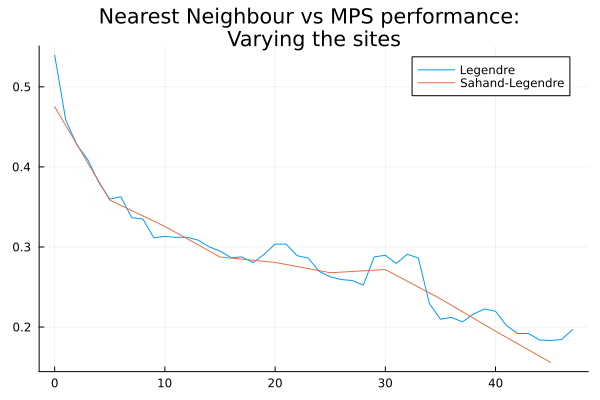

In [13]:
plot(nendpoints_L|> collect, means_mmL_ecg, label="Legendre", title="Nearest Neighbour vs MPS performance: \nVarying the sites")
plot!(nendpoints_SL|> collect, means_medSL_ecg, label="Sahand-Legendre", title="Nearest Neighbour vs MPS performance: \nVarying the sites")

# plot!(nendpoints, means, label="Nearest Neighbour", xlabel="Number of sites given on each end", ylabel="Mean MAE")


In [10]:
means_mmL_ecg

48-element Vector{Float64}:
 0.5394835650902757
 0.45884117204295793
 0.42785116944250573
 0.409083723562762
 0.3806012362793464
 0.359807001233386
 0.36270438983941894
 0.3365154313181287
 0.33498044237678726
 0.31141314255861885
 ⋮
 0.22265991495891385
 0.21976314589574794
 0.20186387489065388
 0.19199269983578318
 0.19195640070012623
 0.18375471572483815
 0.18327775645878397
 0.18450430317927893
 0.19689599556388945